<a href="https://colab.research.google.com/github/gbiamgaurav/Feature-Engineering/blob/main/Missing_values_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### `Arbitrary Value Imputation`

It consists of replacing NAN by an arbitrary value.

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv"

In [3]:
df = pd.read_csv(url, usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
def impute_nan(df, variable):
  df[variable+'_zero']=df[variable].fillna(0)
  df[variable+'_hundred']=df[variable].fillna(100)

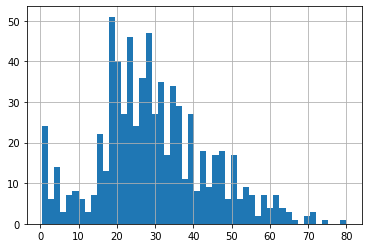

In [5]:
df['Age'].hist(bins=50)

In [ ]:
#### Arbitary values
#### It should not be more frequently present

#### Advantages
* Easy to implement
* Captures the importance of missingess if there is one 

#### Disadvantages
* Distorts the original distribution of the variable
* If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
* Hard to decide which value to use

#### How to Handle Categorical Missing Values

#### `Frequent Category Imputation`

In [7]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gbiamgaurav","key":"25adcca0b19d33a63cbc1bc66924e01d"}'}

In [8]:
! mkdir ~/.kaggle

In [9]:
! cp kaggle.json ~/.kaggle/

In [10]:
! kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 100MB/s]


In [11]:
! unzip /content/house-prices-advanced-regression-techniques.zip

Archive:  /content/house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [12]:
df = pd.read_csv('/content/train.csv')

In [13]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
df = pd.read_csv('/content/train.csv', usecols=['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])

In [16]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [20]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [24]:
### Check the % of missing values and sort the values

(df.isnull().mean()*100).sort_values(ascending=True)

SalePrice       0.000000
BsmtQual        2.534247
GarageType      5.547945
FireplaceQu    47.260274
dtype: float64

In [25]:
df.shape

(1460, 4)

#### Compute the frequency with every feature 

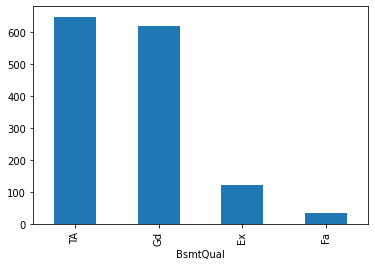

In [28]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

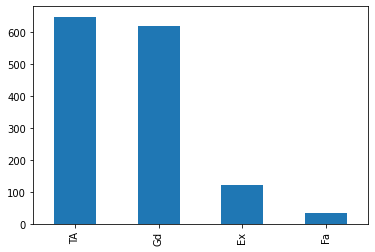

In [30]:
df['BsmtQual'].value_counts().plot.bar()

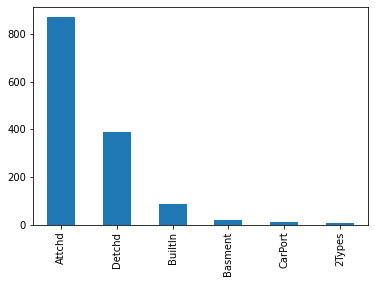

In [31]:
df['GarageType'].value_counts().plot.bar()

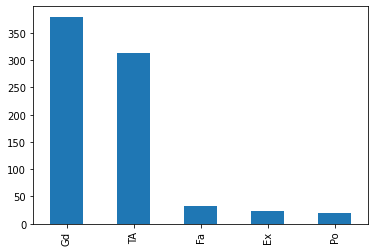

In [32]:
df['FireplaceQu'].value_counts().plot.bar()

In [36]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [37]:
df['BsmtQual'].value_counts().index[0]

'TA'

In [38]:
df['FireplaceQu'].value_counts().index[0]

'Gd'

In [42]:
df['GarageType'].mode()[0]

'Attchd'

In [39]:
#### Replacing function 

def impute_nan(df, variable):
  most_frequent_category = df[variable].value_counts().index[0]
  df[variable].fillna(most_frequent_category, inplace=True)

In [40]:
for feature in ['BsmtQual', 'FireplaceQu', 'GarageType']:
  impute_nan(df, feature)

In [41]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

#### Advantages :- 
* Easy to implement
* Faster to implement

#### Disadvantages :-  
* Since we are using the more frequent labels it may use them in an over represented way if there are many NANs.
* It distorts the relation of the most frequent label

#### `Adding a variable to capture NAN`

In [48]:
df = pd.read_csv('/content/train.csv', usecols=['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])

In [49]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [50]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [51]:
df['BsmtQual_var'] = np.where(df['BsmtQual'].isnull(), 1, 0)

In [52]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [58]:
df['BsmtQual'].mode()[0]

'TA'

In [54]:
frequent = df['BsmtQual'].mode()[0]

In [55]:
df['BsmtQual'].fillna(frequent, inplace=True)

In [56]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [59]:
df['FireplaceQu_var'] = np.where(df['FireplaceQu'].isnull(), 1, 0)
frequent = df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent, inplace=True)

In [60]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


In [61]:
df['GarageType_var'] = np.where(df['GarageType'].isnull(), 1, 0)
frequent = df['GarageType'].mode()[0]
df['GarageType'].fillna(frequent, inplace=True)

In [62]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var,GarageType_var
0,Gd,Gd,Attchd,208500,0,1,0
1,Gd,TA,Attchd,181500,0,0,0
2,Gd,TA,Attchd,223500,0,0,0
3,TA,Gd,Detchd,140000,0,0,0
4,Gd,TA,Attchd,250000,0,0,0


In [ ]:
#### Suppose if you have more frequent categories, we just replace NAN with a new category